In [1]:
!pip install networkx

In [2]:
#import the csv file needed
from google.colab import files
uploaded = files.upload()

Saving lastfm_asia_edges.csv to lastfm_asia_edges.csv


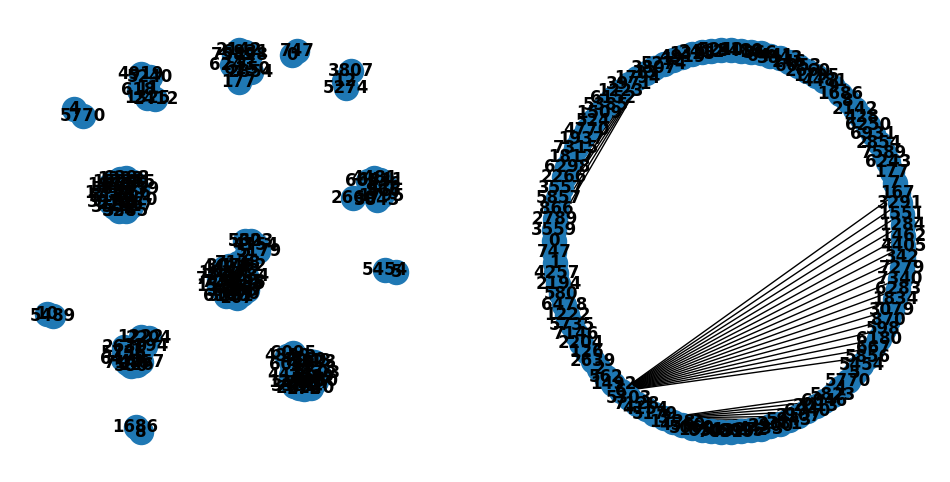

In [3]:
#load the data with networkX since snap-standord is having install issues
import io
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv(io.BytesIO(uploaded['lastfm_asia_edges.csv']))

G = nx.from_pandas_edgelist(df,'node_1','node_2')



#graph it to see it
graph_df = df.head(100)
G2 = nx.from_pandas_edgelist(graph_df,'node_1','node_2')

# Generate positions for each node using one of NetworkX's layout algorithms
pos = nx.spring_layout(G2)

# Now you can draw the graph using the positions
plt.figure(figsize=(12, 6))
subax1 = plt.subplot(121)
nx.draw(G2, pos=pos, with_labels=True, font_weight='bold')

shells = [list(G2.nodes())]  # This puts all nodes in one shell.

subax2 = plt.subplot(122)
nx.draw_shell(G2, nlist=shells, with_labels=True, font_weight='bold')

plt.show()

In [4]:
#this is across all nodes though. We need to modify this so it's only from node 0 to
#all other nodes
nx.average_shortest_path_length(G)

5.232237268915701

In [5]:
first_node = 0

#get the shortest path length from node 0 to all other nodes
path_lengths = nx.single_source_shortest_path_length(G, first_node)


#get the average of the shortest path length from 0 to all other nodes
average_path_length = sum(path_lengths.values()) / len(path_lengths)

average_path_length

5.651232948583421